# Limpieza de Datos

La limpieza de datos es importante porque el no detectar datos erróneos puede llevar a conclusiones incorrectas o simplemente impedirnos seguir con los pasos de análisis.

En primera instancia, la limpieza empieza con la exploración de los datos y podemos usar los siguientes comandos:

    .info()
    .describe()
    .astype()
    .str.strip()
    .duplicated()
    .loc[indice,columna]
    .drop_duplicates()
    .groupby(by=columname)
    .groupby(by=columname).agg()
    .sort_values
    set().difference()
    .isin()
    .unique()


In [6]:
# Importar todas las librerías para ejecutar comandos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(np.random.rand(12,2), columns=['A', 'B'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
A    12 non-null float64
B    12 non-null float64
dtypes: float64(2)
memory usage: 272.0 bytes


In [4]:
df.head()

,A,B
0,0.209169,0.237765
1,0.722617,0.830855
2,0.705288,0.313846
3,0.606281,0.306475
4,0.006090,0.235130


In [5]:
df.tail()

,A,B
7,0.184684,0.447803
8,0.694180,0.191929
9,0.077212,0.099392
10,0.391706,0.672253
11,0.919925,0.354061


In [6]:
df.describe()

,A,B
count,12.000000,12.000000
mean,0.501938,0.462894
std,0.315813,0.300661
min,0.006090,0.099392
25%,0.203047,0.237106
50%,0.614844,0.333953
75%,0.709620,0.711903
max,0.919925,0.991806


In [7]:
df.astype(int)

,A,B
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Slicing (rebanado)
Una de las herramientas más poderosas que provee pandas Dataframe es que nos permite manipular subconjuntos de datos de DataFrame para nuestra conveninecia.

In [8]:
print(df)

           A         B
0   0.209169  0.237765
1   0.722617  0.830855
2   0.705288  0.313846
3   0.606281  0.306475
4   0.006090  0.235130
5   0.882697  0.991806
6   0.623408  0.873409
7   0.184684  0.447803
8   0.694180  0.191929
9   0.077212  0.099392
10  0.391706  0.672253
11  0.919925  0.354061


In [9]:
df

,A,B
0,0.209169,0.237765
1,0.722617,0.830855
2,0.705288,0.313846
3,0.606281,0.306475
4,0.006090,0.235130
5,0.882697,0.991806
6,0.623408,0.873409
7,0.184684,0.447803
8,0.694180,0.191929
9,0.077212,0.099392


In [10]:
#Tomar únicamente datos donde A > 0.5
subset = df[df['A']>0.5]
print(subset)

           A         B
1   0.722617  0.830855
2   0.705288  0.313846
3   0.606281  0.306475
5   0.882697  0.991806
6   0.623408  0.873409
8   0.694180  0.191929
11  0.919925  0.354061


In [11]:
subset

,A,B
1,0.722617,0.830855
2,0.705288,0.313846
3,0.606281,0.306475
5,0.882697,0.991806
6,0.623408,0.873409
8,0.694180,0.191929
11,0.919925,0.354061


In [12]:
# Observamos que conserva los índices anteriores
subset.index

Int64Index([1, 2, 3, 5, 6, 8, 11], dtype='int64')

In [13]:
# Si nos interesa tener un nuevo DataFrame sin estos índices
subset.reset_index(inplace=True, drop=True)
print(subset)

          A         B
0  0.722617  0.830855
1  0.705288  0.313846
2  0.606281  0.306475
3  0.882697  0.991806
4  0.623408  0.873409
5  0.694180  0.191929
6  0.919925  0.354061


In [14]:
# Observa como cambia la forma de impresión al usar print en los DataFrames
subset

,A,B
0,0.722617,0.830855
1,0.705288,0.313846
2,0.606281,0.306475
3,0.882697,0.991806
4,0.623408,0.873409
5,0.694180,0.191929
6,0.919925,0.354061


In [15]:
new_df = pd.DataFrame(
                        data=[['Amsterdam','rojo'],['Paris', 'azul'],['Mexico','rojo']], 
                        columns=['Lugar','Color'])

In [16]:
new_df

,Lugar,Color
0,Amsterdam,rojo
1,Paris,azul
2,Mexico,rojo


In [17]:
# Buscar duplicados
new_df['Color'].duplicated()

0    False
1    False
2     True
Name: Color, dtype: bool

In [18]:
# Buscar los valores únicos de una columna
new_df['Color'].unique()

array(['rojo', 'azul'], dtype=object)

In [19]:
# Rebanar las filas donde se cumple la condición
new_df[new_df['Color'] == 'rojo']

,Lugar,Color
0,Amsterdam,rojo
2,Mexico,rojo


In [20]:
# Asignar a una variable
rojo = new_df[new_df['Color'] == 'rojo']

In [21]:
rojo

,Lugar,Color
0,Amsterdam,rojo
2,Mexico,rojo


In [22]:
# Hagamos un DataFrame con strings dentro
combined_df = pd.DataFrame(data=[['Amsterdam','numero 2'],['Paris', 'numero 6'],['Mexico','numero 7']], columns=['Lugar','Numero'])

In [23]:
combined_df

,Lugar,Numero
0,Amsterdam,numero 2
1,Paris,numero 6
2,Mexico,numero 7


In [24]:
# Localizar un valor de acuerdo a su índice y columna
combined_df.loc[1,'Lugar']

'Paris'

In [25]:
# Seleccionar sólo uan columna del DataFrame
combined_df['Numero']

0    numero 2
1    numero 6
2    numero 7
Name: Numero, dtype: object

In [26]:
# Retirar cierto string a una columna entera
combined_df['Numero'].str.strip('numero ')

0    2
1    6
2    7
Name: Numero, dtype: object

In [27]:
serie = combined_df['Numero'].str.strip('numero')
# Checa el tipo de variable
serie[0]

' 2'

In [28]:
# Retirar el espacio faltante a la serie
serie.str.strip(' ')

0    2
1    6
2    7
Name: Numero, dtype: object

In [29]:
serie_2 = serie.str.strip(' ')
# Checa el tipo de variable
serie_2[0]

'2'

In [30]:
# Checar el tipo de dato
type(serie_2[0])

str

In [31]:
# Convertir la serie a int para hacer operaciones
serie_2.astype(int)

0    2
1    6
2    7
Name: Numero, dtype: int32

In [32]:
# Ejercicio con datos nulos dentro de un DataFrame
nan_df = pd.DataFrame(
                        data=[['Amsterdam', np.nan],['Paris', 'azul'],['Mexico','rojo']], 
                        columns=['Lugar','Color'])

In [33]:
nan_df

,Lugar,Color
0,Amsterdam,NaN
1,Paris,azul
2,Mexico,rojo


In [34]:
# Verificar datos nulos o faltantes
nan_df.isnull()

,Lugar,Color
0,False,True
1,False,False
2,False,False


In [35]:
# Se puede imputar un dato de acuerdo al conocimeinto del origen de los datos
nan_df.fillna('neutro')

,Lugar,Color
0,Amsterdam,neutro
1,Paris,azul
2,Mexico,rojo


In [36]:
# O eliminar la columna si no hace sentido
nan_df.dropna()

,Lugar,Color
1,Paris,azul
2,Mexico,rojo


Vamos a ver una función muy específica de una librería que nos permite contar los elementos de una lista, arreglo o Serie. Esta librería se llama *collections* y usaremos la función **Counter**

In [1]:
from collections import Counter
data = ['a','a','b','c','c']
count = Counter(data)
print(count)

Counter({'a': 2, 'c': 2, 'b': 1})


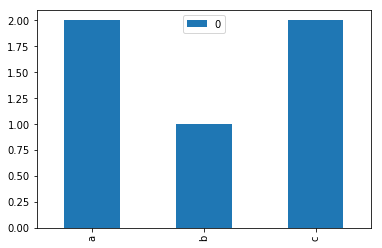

In [7]:
# Vamos a visualizar al colocar la información en un DataFrame y a usar una función de gráfica directa del módulo de pandas.
df = pd.DataFrame.from_dict(count, orient='index')
df.plot(kind='bar')
plt.show()